<a href="https://colab.research.google.com/github/Patrick-Setubal/data_science_analytics/blob/main/alura_curso/formacao_data_science/SeriesTemporais/SeriesTemporais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Alucar - Analisando as Vendas


In [1]:
# Importações
import pandas as pd 
import seaborn as sns 
from matplotlib import pyplot as plt 

In [2]:
# Obtendo Dados
alucar = pd.read_csv("https://raw.githubusercontent.com/Patrick-Setubal/data_science_analytics/main/alura_curso/formacao_data_science/SeriesTemporais/alucar.csv")

# Verificar tamanho do Dataset, Quantidade de Nulos, Type das colunas  
alucar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mes     24 non-null     object
 1   vendas  24 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 512.0+ bytes


In [3]:
# Transformando a coluna "mes" que esta no formato object em datatime
alucar.mes = pd.to_datetime(alucar.mes)
alucar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   mes     24 non-null     datetime64[ns]
 1   vendas  24 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 512.0 bytes


# Graficos separados

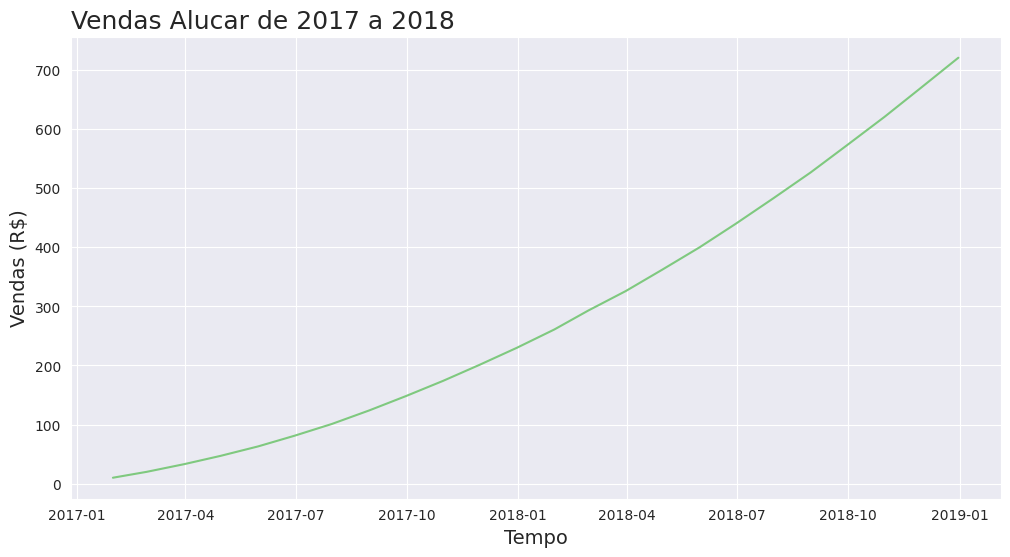

In [4]:
# Configurar Aparencia do grafico
sns.set_palette('Accent')
sns.set_style('darkgrid')

# Exibir grafico de linha 
ax = sns.lineplot(x='mes' ,y='vendas', data=alucar)
ax.figure.set_size_inches(12,6)
ax.set_title("Vendas Alucar de 2017 a 2018", loc='left', fontsize=18 )
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Vendas (R$)', fontsize=14)
ax = ax

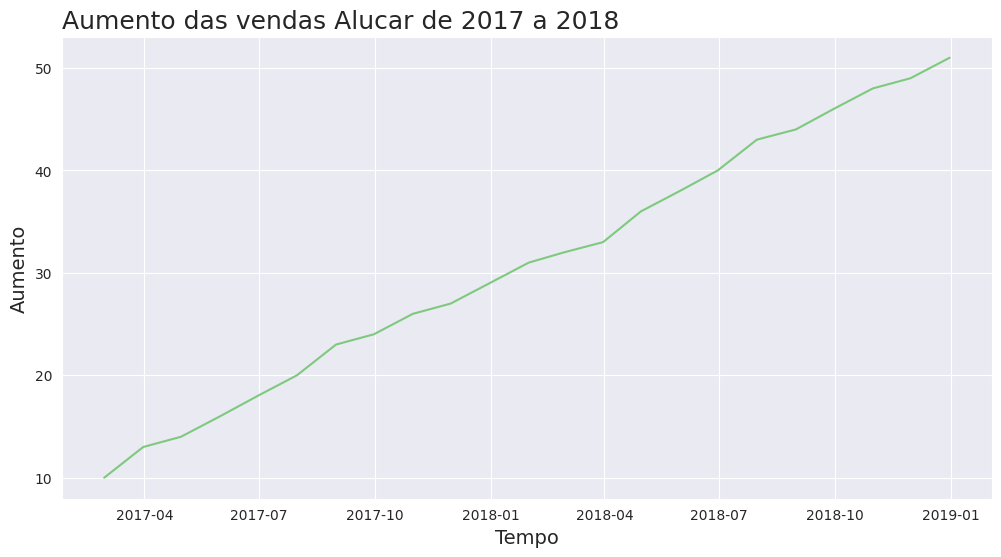

In [12]:
# plotar o grafico com o aumento das vendas
alucar['aumento'] = alucar.vendas.diff()

# Exibir grafico de linha 
ax = sns.lineplot(x='mes' ,y='aumento', data=alucar)
ax.figure.set_size_inches(12,6)
ax.set_title("Aumento das vendas Alucar de 2017 a 2018", loc='left', fontsize=18 )
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Aumento', fontsize=14)
ax = ax

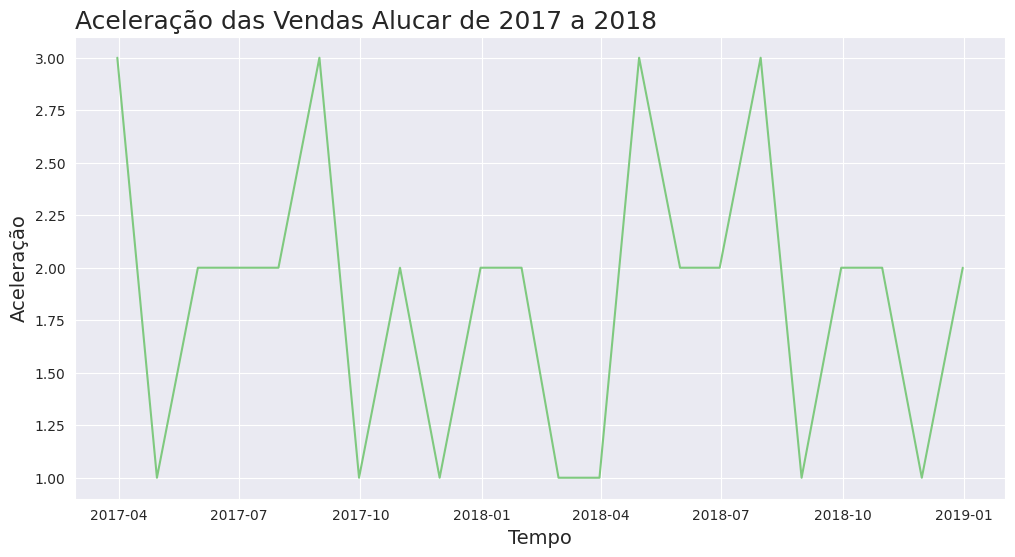

In [15]:
# Definir aceleração
alucar['aceleracao'] = alucar.aumento.diff()

# Exibir grafico de linha 
ax = sns.lineplot(x='mes' ,y='aceleracao', data=alucar)
ax.figure.set_size_inches(12,6)
ax.set_title("Aceleração das Vendas Alucar de 2017 a 2018", loc='left', fontsize=18 )
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Aceleração', fontsize=14)
ax = ax

# Graficos Unidos 

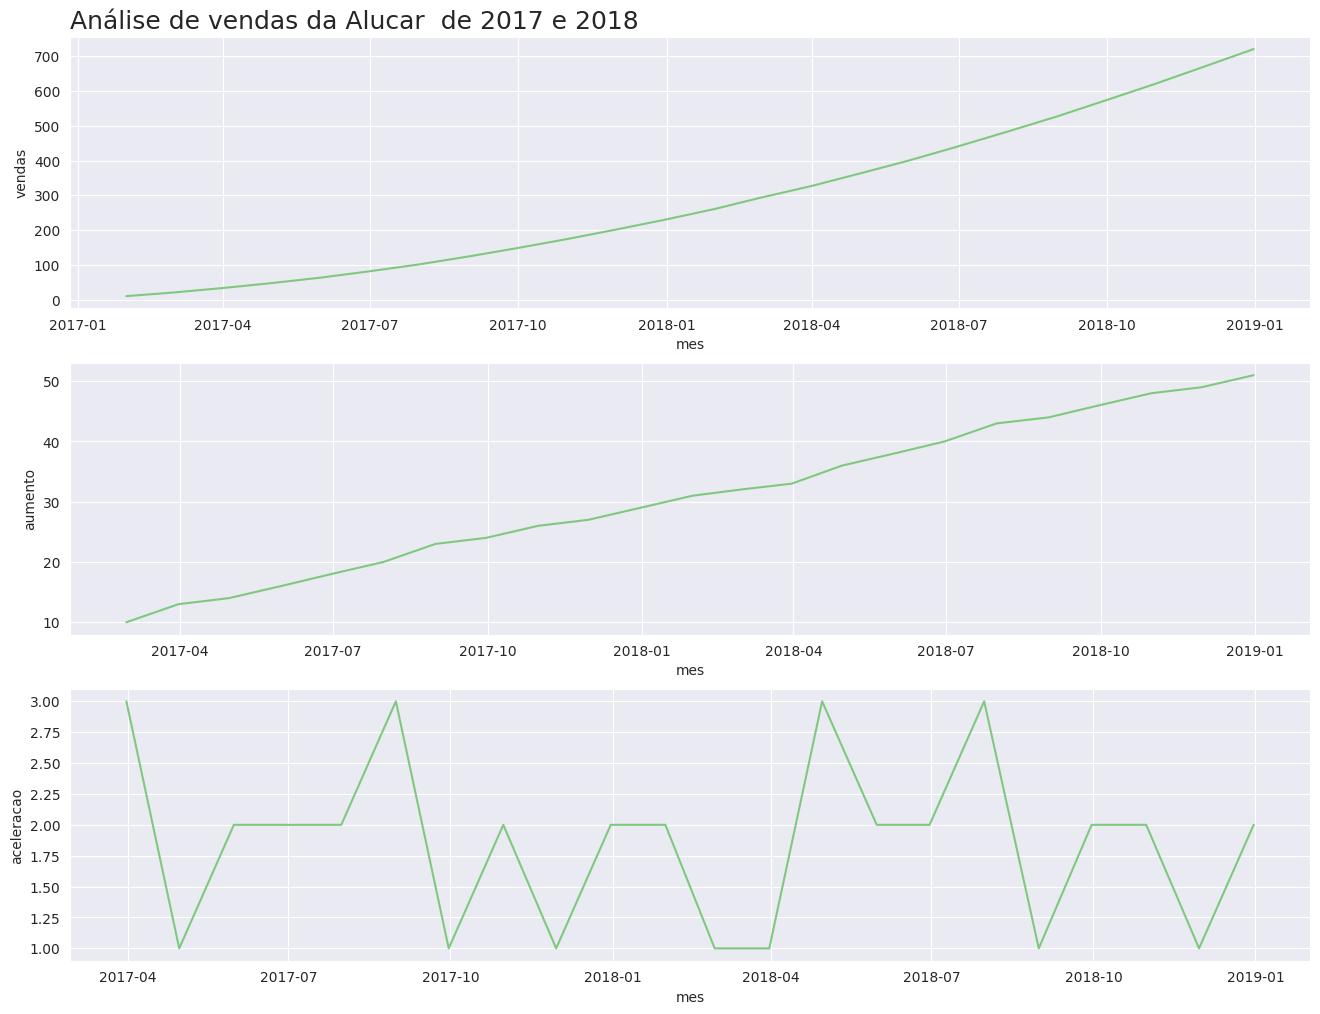

In [26]:
# Plotar 3 Graficos juntos
# Grafico de vendas
plt.figure(figsize=(16,12))
ax = plt.subplot(3,1,1)
ax.set_title("Análise de vendas da Alucar  de 2017 e 2018", fontsize=18, loc='left')
sns.lineplot(x='mes', y='vendas', data=alucar)

# Grafico do aumento de vendas
plt.subplot(3,1,2)
ax = sns.lineplot(x='mes', y='aumento', data=alucar)

# Grafico da aceleração das vendas
plt.subplot(3,1,3)
ax = sns.lineplot(x='mes', y='aceleracao', data=alucar)

# Correlação

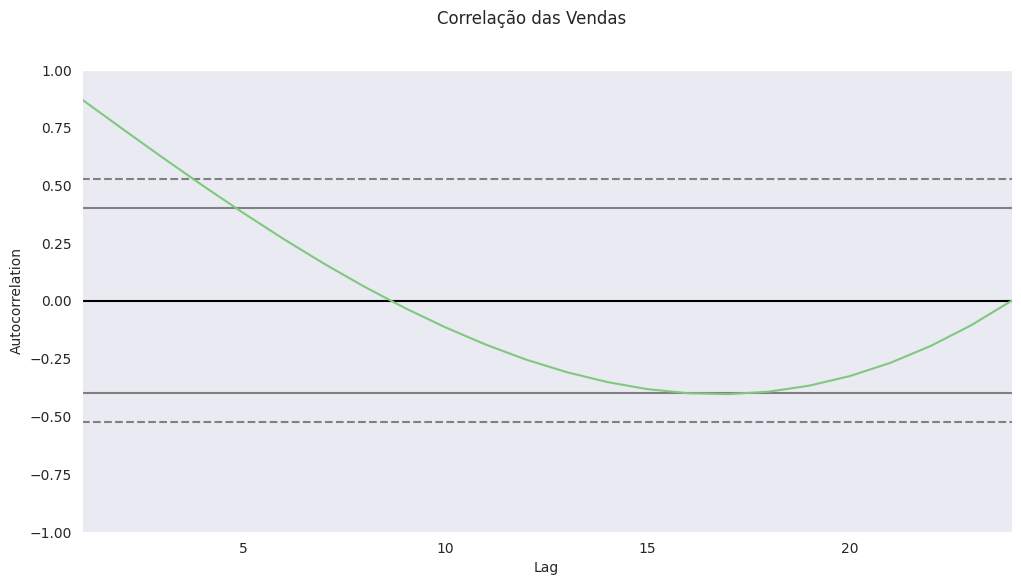

In [44]:
from pandas.plotting import autocorrelation_plot
# Plotar grafico de corelação temporal das vendas 
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das Vendas')
autocorrelation_plot(alucar.vendas)
ax = ax

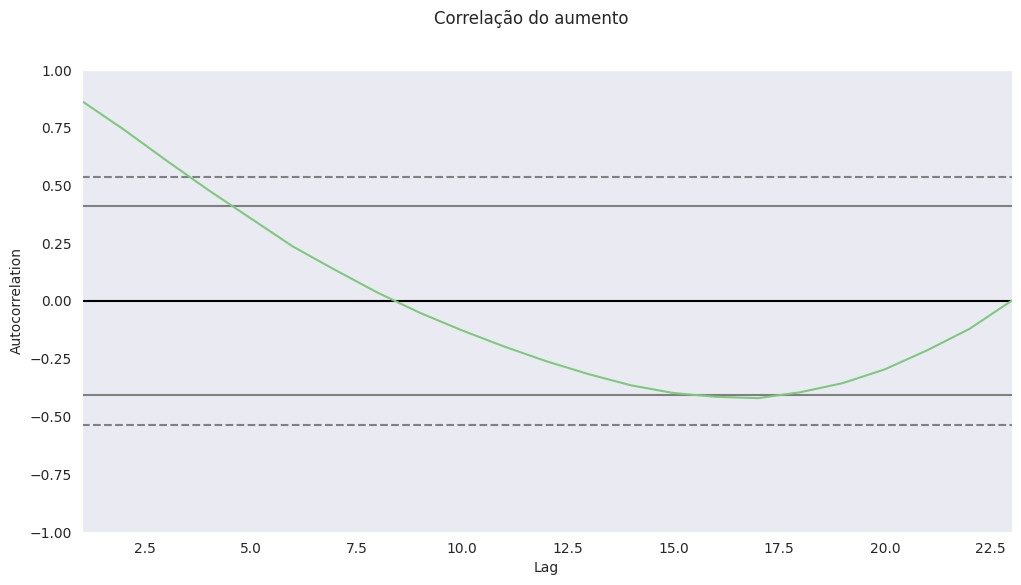

In [49]:
# Plotar grafico de corelação temporal do Aumento 
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do aumento')
autocorrelation_plot(alucar.aumento[1:])
ax = ax

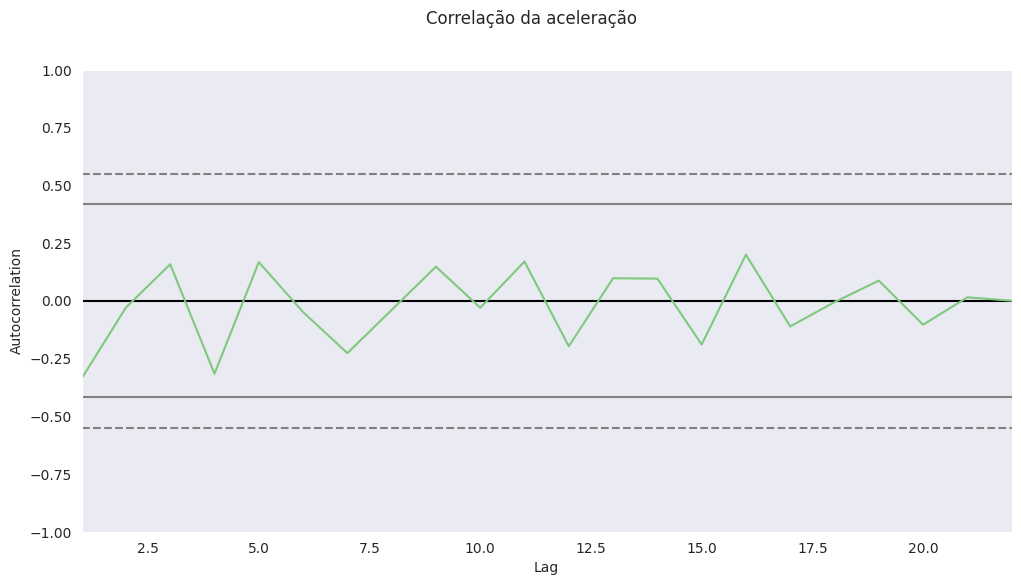

In [48]:
# Plotar grafico de corelação temporal da Aceleração
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação da aceleração')
autocorrelation_plot(alucar.aceleracao[2:])
ax = ax

# Proxima